In [7]:
# import sqlite3
import os
from deltalake import DeltaTable
from deltalake.writer import write_deltalake
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# conn = sqlite3.connect("database.sqlite")

In [42]:
# Read in gold tables
avg_height_by_grade_year_df = DeltaTable("data/gold/avg_height_by_grade_year").to_pandas()
users_grouped_by_country = DeltaTable("data/gold/users_grouped_by_country").to_pandas()
# ascent_silver_df = DeltaTable("data/silver/ascent").to_pandas()
ascents_by_year_df = DeltaTable("data/gold/ascents_by_year").to_pandas()

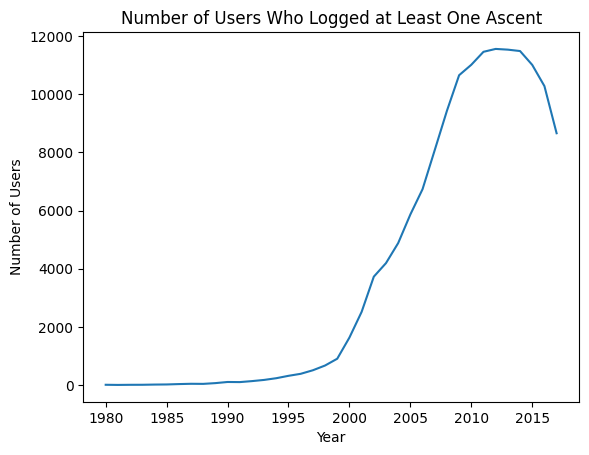

In [58]:
# Number of users who logged at least one ascent 
plt.plot(ascents_by_year_df['year'], ascents_by_year_df['num_users'])
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.title('Number of Users Who Logged at Least One Ascent')
plt.show()

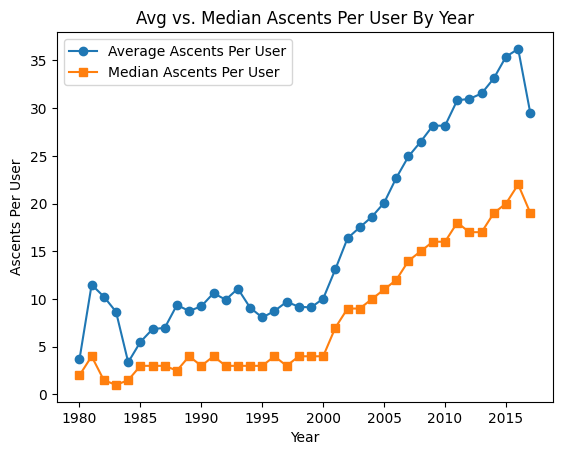

In [47]:
# Ascents per user
plt.plot(ascents_by_year_df['year'], ascents_by_year_df['avg_ascents_per_user'], label='Average Ascents Per User', marker='o' )
plt.plot(ascents_by_year_df['year'], ascents_by_year_df['median_ascents_per_user'], label='Median Ascents Per User', marker='s' )

plt.xlabel('Year')
plt.ylabel('Ascents Per User')
plt.title('Avg vs. Median Ascents Per User By Year') 
plt.legend()
plt.show()

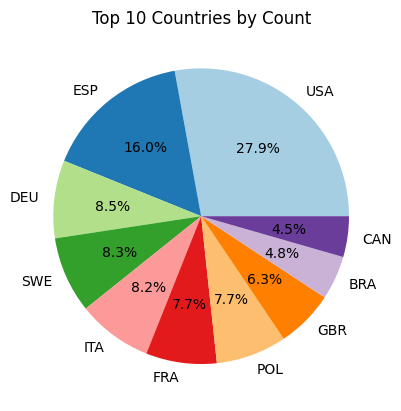

In [30]:
# Display the top 10 countries for users
top_10_countries = users_grouped_by_country.sort_values(by="count", ascending=False).head(10)
plt.pie(top_10_countries["count"], labels=top_10_countries["country"], autopct="%1.1f%%",  colors=plt.cm.Paired.colors)
plt.title("Top 10 Countries by Count")

plt.show()